# Observaciones previas

Sesión utilizada:
- Introducción a Machine Learning (1)

Sesión no utilizada en ningun ejercicio
- Árboles de decisión (5)
- Fundamentos de procesamiento de imagenes (8)

# Importaciones 

In [2]:
# Librerías para limpieza y depuracion del dataset
import numpy as np
import pandas as pd

# Librerías para las correlaciones
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# IMPORTACIÓN DEL DATASET
df_online_sales = pd.read_csv('dataset/online-sales-usa.csv')           # Importamos el dataset
# df_online_sales = df_online_sales.reset_index()                       # Reseteamos en index
df_online_sales.head()                                                  # Revisamos el dataframe

# Corregir el warning DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.

C:\Users\aizam\AppData\Local\Temp\ipykernel_19460\2202774352.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_online_sales = pd.read_csv('dataset/online-sales-usa.csv')           # Importamos el dataset


,order_id,order_date,status,item_id,sku,qty_ordered,price,value,discount_amount,total,...,SSN,PhoneNo,PlaceName,County,City,State,Zip,Region,UserName,Discount_Percent
0,100354678,01/10/2020,received,574772,oasis_Oasis-064-36,21,89.9,1798.0,0.0,1798.0,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
1,100354678,01/10/2020,received,574774,Fantastic_FT-48,11,19.0,190.0,0.0,190.0,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
2,100354680,01/10/2020,complete,574777,mdeal_DMC-610-8,9,149.9,1199.2,0.0,1199.2,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
3,100354680,01/10/2020,complete,574779,oasis_Oasis-061-36,9,79.9,639.2,0.0,639.2,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
4,100367357,13/11/2020,received,595185,MEFNAR59C38B6CA08CD,2,99.9,99.9,0.0,99.9,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0


In [4]:
# Revisamos las primeras 20 filas
df_online_sales.head(10)                                                # Funciona, opcional ejecutarlo cada vez que abra esta libreta

,order_id,order_date,status,item_id,sku,qty_ordered,price,value,discount_amount,total,...,SSN,PhoneNo,PlaceName,County,City,State,Zip,Region,UserName,Discount_Percent
0,100354678,01/10/2020,received,574772,oasis_Oasis-064-36,21,89.9,1798.0,0.0,1798.0,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
1,100354678,01/10/2020,received,574774,Fantastic_FT-48,11,19.0,190.0,0.0,190.0,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
2,100354680,01/10/2020,complete,574777,mdeal_DMC-610-8,9,149.9,1199.2,0.0,1199.2,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
3,100354680,01/10/2020,complete,574779,oasis_Oasis-061-36,9,79.9,639.2,0.0,639.2,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
4,100367357,13/11/2020,received,595185,MEFNAR59C38B6CA08CD,2,99.9,99.9,0.0,99.9,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
5,100367357,13/11/2020,received,595186,MEFBUY59B7C3DDC2CA3-42,2,39.9,39.9,0.0,39.9,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
6,100367360,13/11/2020,order_refunded,595192,MATDAN59C3C845B38F0,2,47.6,47.6,0.0,47.6,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
7,100354677,01/10/2020,canceled,574769,GFE_19_USBLEDLight,2,49.0,49.0,0.0,49.0,...,185-86-4345,239-335-6755,Graham,Bradford,Graham,FL,32042,South,lseaker,0.0
8,100354677,01/10/2020,canceled,574770,oasis_Kingston-32GB-DTIG4,2,135.0,135.0,0.0,135.0,...,185-86-4345,239-335-6755,Graham,Bradford,Graham,FL,32042,South,lseaker,0.0
9,100354677,01/10/2020,canceled,574771,Geepas_GSB5420,2,549.9,549.9,0.0,549.9,...,185-86-4345,239-335-6755,Graham,Bradford,Graham,FL,32042,South,lseaker,0.0


In [5]:
# Ver algunas filas
print(df_online_sales.loc[130:150, :])                                  # Funciona, opcional ejecutarlo cada vez que abra esta libreta

      order_id  order_date    status  item_id                      sku  \
130  100357662  17/10/2020  received   580170      BAGVAT59AC71117ED75   
131  100357662  17/10/2020  received   580171      MEFMUN59ADC5B9B10F9   
132  100362846  07/11/2020  complete   588313      HASONC59AC64DFADA78   
133  100362846  07/11/2020  complete   588314      APPHED59D47BB72D66F   
134  100362846  07/11/2020  complete   588315      BAGSAM59AC83996DB4B   
135  100383440  20/12/2020  complete   621667    MEFBNB59FC74FFCBC1B-L   
136  100383440  20/12/2020  complete   621669    MEFBNB59FC74FDBC09F-L   
137  100383440  20/12/2020  complete   621671   MEFBAT5A0145183EC4B-43   
138  100445653  17/02/2021  complete   731046      HASONC59BA3E1B56590   
139  100445653  17/02/2021  complete   731047    MEFREL59AC079AE6C6F-L   
140  100468670  02/04/2021  canceled   767902      HASONC59AC64DFADA78   
141  100468676  02/04/2021  canceled   767915      HASONC59AC64DFADA78   
142  100468677  02/04/2021  canceled  

# Desarrollo de código

### Análisis previo

In [6]:
# EXPLORACIÓN DE LSO TIPOS DE DATOS

# df_online_sales.dtypes                                                            # Exploración básica de los tipos de datos

df_online_sales.info()                                                              # Información mas detallada del dataset, además de los tipos de datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286392 entries, 0 to 286391
Data columns (total 36 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   order_id          286392 non-null  object 
 1   order_date        286392 non-null  object 
 2   status            286392 non-null  object 
 3   item_id           286392 non-null  int64  
 4   sku               286392 non-null  object 
 5   qty_ordered       286392 non-null  int64  
 6   price             286392 non-null  float64
 7   value             286392 non-null  float64
 8   discount_amount   286392 non-null  float64
 9   total             286392 non-null  float64
 10  category          286392 non-null  object 
 11  payment_method    286392 non-null  object 
 12  bi_st             286392 non-null  object 
 13  cust_id           286392 non-null  int64  
 14  year              286392 non-null  int64  
 15  month             286392 non-null  object 
 16  ref_num           28

In [7]:
# Dimensiones del dataset
df_online_sales.shape

(286392, 36)

#### Correcciones al dataset

In [9]:
# Eliminar columnas innecesarias
df_olsales_filt = df_online_sales.drop(columns=['NamePrefix','FirstName','MiddleInitial','LastName','full_name','EMail','SSN','PhoneNo','UserName'])
df_olsales_filt.head()

,order_id,order_date,status,item_id,sku,qty_ordered,price,value,discount_amount,total,...,Gender,age,CustomerSince,PlaceName,County,City,State,Zip,Region,Discount_Percent
0,100354678,01/10/2020,received,574772,oasis_Oasis-064-36,21,89.9,1798.0,0.0,1798.0,...,F,43,8/22/2006,Vinson,Harmon,Vinson,OK,73571,South,0.0
1,100354678,01/10/2020,received,574774,Fantastic_FT-48,11,19.0,190.0,0.0,190.0,...,F,43,8/22/2006,Vinson,Harmon,Vinson,OK,73571,South,0.0
2,100354680,01/10/2020,complete,574777,mdeal_DMC-610-8,9,149.9,1199.2,0.0,1199.2,...,F,43,8/22/2006,Vinson,Harmon,Vinson,OK,73571,South,0.0
3,100354680,01/10/2020,complete,574779,oasis_Oasis-061-36,9,79.9,639.2,0.0,639.2,...,F,43,8/22/2006,Vinson,Harmon,Vinson,OK,73571,South,0.0
4,100367357,13/11/2020,received,595185,MEFNAR59C38B6CA08CD,2,99.9,99.9,0.0,99.9,...,F,43,8/22/2006,Vinson,Harmon,Vinson,OK,73571,South,0.0


In [10]:
# CREACIÓN DE UN DATAFRAME CON LA CORRECCIÓN DEL ORDEN DEL MÉS Y DÍA DE LA COLUMNA df_olsales_filt['order_date']

# Extraemos los valores de la columna 'order_date' - df_olsales_filt['order_date']
df_day = df_olsales_filt['order_date'].str[:2].to_frame()
df_month = df_olsales_filt['order_date'].str[3:5].to_frame()
df_year = df_olsales_filt['order_date'].str[-4:].to_frame()

# Comprobamos los nuevos dataframe
# print(df_day)
# print(df_month)
# print(df_year)

# Renombramos la columa de los nuevos dataframes
df_day.columns = ['day']
df_month.columns = ['month']
df_year.columns = ['year']

df_temp_data =pd.concat([df_month, df_day, df_year], axis=1)                        # Creamos un nuevo dataframe concatenando los tres generados
df_temp_data.head(10)                                                               # Verificamos el nuevo dataframe

# Creamos una nueva columna concatenando tres columnas, entre cada coluna concatenada poner un separador (/)
df_temp_data['date_OK'] = df_temp_data['month'].str.cat(df_temp_data['day'].str.cat(df_temp_data['year'].astype(str), sep='/'), sep='/')

df_temp_data.head(10)                                                             # Comprobamos EL dataframe temporal con la nueva columna

,month,day,year,date_OK
0,10,01,2020,10/01/2020
1,10,01,2020,10/01/2020
2,10,01,2020,10/01/2020
3,10,01,2020,10/01/2020
4,11,13,2020,11/13/2020
5,11,13,2020,11/13/2020
6,11,13,2020,11/13/2020
7,10,01,2020,10/01/2020
8,10,01,2020,10/01/2020
9,10,01,2020,10/01/2020


In [11]:
# CORRECCIÓN DE LSO TIPOS DE DATOS                                          # Hacer los de 'month' y quitarlo despues del reemplazo
# df_temp_data.dtypes                                                               # Checamos sus tips de datos

df_temp_data['date_OK'] = df_temp_data['date_OK'].astype('datetime64[us]')          # Cambiamos el tipo de datos de date_OK
df_temp_data.dtypes                                                                 # verificamos el cambio

month              object
day                object
year               object
date_OK    datetime64[us]
dtype: object

In [12]:
# Volvemos a verificar el dataframe, pero visualizando la información
df_temp_data.head(15)

,month,day,year,date_OK
0,10,01,2020,2020-10-01
1,10,01,2020,2020-10-01
2,10,01,2020,2020-10-01
3,10,01,2020,2020-10-01
4,11,13,2020,2020-11-13
5,11,13,2020,2020-11-13
6,11,13,2020,2020-11-13
7,10,01,2020,2020-10-01
8,10,01,2020,2020-10-01
9,10,01,2020,2020-10-01


In [13]:
# REEMPLAZO DE VALORES POR LO YA ORDENADOS CORRECTAMENTE

df_olsales_filt['order_date'] = df_temp_data['date_OK']                         # Reemplazamos el valor de la columna df_olsales_filt['order_date']
df_olsales_filt['order_date'].head(15)                                          # Verificamos la información del dataframe

0    2020-10-01
1    2020-10-01
2    2020-10-01
3    2020-10-01
4    2020-11-13
5    2020-11-13
6    2020-11-13
7    2020-10-01
8    2020-10-01
9    2020-10-01
10   2020-10-08
11   2020-10-21
12   2020-12-24
13   2020-12-24
14   2020-12-24
Name: order_date, dtype: datetime64[us]

In [14]:
# Cambiar tipos de datos de columnas de fecha de object a date - Revisar formatos de fecha y corregir

# df_olsales_filt['order_id'] = pd.to_numeric(df_olsales_filt['order_id'])                            # Convertiría en valores numéricos la columna df_olsales_filt['order_id' pero contiene valores no convertibles]
# df_olsales_filt[df_olsales_filt['order_date']'order_date'].astype('datetime64[us]')              # Corregir order date, esta tomando al reves mes y día.
df_olsales_filt['CustomerSince'] = df_olsales_filt['CustomerSince'].astype('datetime64[us]')
df_olsales_filt.dtypes

order_id                    object
order_date          datetime64[us]
status                      object
item_id                      int64
sku                         object
qty_ordered                  int64
price                      float64
value                      float64
discount_amount            float64
total                      float64
category                    object
payment_method              object
bi_st                       object
cust_id                      int64
year                         int64
month                       object
ref_num                      int64
Gender                      object
age                          int64
CustomerSince       datetime64[us]
PlaceName                   object
County                      object
City                        object
State                       object
Zip                          int64
Region                      object
Discount_Percent           float64
dtype: object

In [15]:
# Verificación del dataset
df_olsales_filt.head()

,order_id,order_date,status,item_id,sku,qty_ordered,price,value,discount_amount,total,...,Gender,age,CustomerSince,PlaceName,County,City,State,Zip,Region,Discount_Percent
0,100354678,2020-10-01,received,574772,oasis_Oasis-064-36,21,89.9,1798.0,0.0,1798.0,...,F,43,2006-08-22,Vinson,Harmon,Vinson,OK,73571,South,0.0
1,100354678,2020-10-01,received,574774,Fantastic_FT-48,11,19.0,190.0,0.0,190.0,...,F,43,2006-08-22,Vinson,Harmon,Vinson,OK,73571,South,0.0
2,100354680,2020-10-01,complete,574777,mdeal_DMC-610-8,9,149.9,1199.2,0.0,1199.2,...,F,43,2006-08-22,Vinson,Harmon,Vinson,OK,73571,South,0.0
3,100354680,2020-10-01,complete,574779,oasis_Oasis-061-36,9,79.9,639.2,0.0,639.2,...,F,43,2006-08-22,Vinson,Harmon,Vinson,OK,73571,South,0.0
4,100367357,2020-11-13,received,595185,MEFNAR59C38B6CA08CD,2,99.9,99.9,0.0,99.9,...,F,43,2006-08-22,Vinson,Harmon,Vinson,OK,73571,South,0.0


In [16]:
# Revisión de algunas filas de algunas columnas del dataframe
print(df_olsales_filt.loc[1:20, ['order_date','year', 'month', 'CustomerSince']])

   order_date  year     month CustomerSince
1  2020-10-01  2020    oct-20    2006-08-22
2  2020-10-01  2020    oct-20    2006-08-22
3  2020-10-01  2020    oct-20    2006-08-22
4  2020-11-13  2020    nov-20    2006-08-22
5  2020-11-13  2020    nov-20    2006-08-22
6  2020-11-13  2020    nov-20    2006-08-22
7  2020-10-01  2020    oct-20    1981-02-04
8  2020-10-01  2020    oct-20    1981-02-04
9  2020-10-01  2020    oct-20    1981-02-04
10 2020-10-08  2020    oct-20    1981-02-04
11 2020-10-21  2020    oct-20    1981-02-04
12 2020-12-24  2020  Dec-2020    1981-02-04
13 2020-12-24  2020  Dec-2020    1981-02-04
14 2020-12-24  2020  Dec-2020    1981-02-04
15 2020-12-24  2020  Dec-2020    1981-02-04
16 2020-12-24  2020  Dec-2020    1981-02-04
17 2020-12-24  2020  Dec-2020    1981-02-04
18 2020-12-24  2020  Dec-2020    1981-02-04
19 2020-12-24  2020  Dec-2020    1981-02-04
20 2020-12-24  2020  Dec-2020    1981-02-04


#### REEMPLAZAMOS DATOS DE ALGUNAS COLUMNAS DE OBJECTS A INT O NUMS CON SU RESPECTIVA CREACIÓN DE DATAFRAMES DE CATALOGOS

In [17]:
# REEMPLAZO DE VALORES DE df_olsales_filt['month'] (por los de df_temp_data['month'])     # Después de acabar el módulo, en lugar de reemplazar columna, hacer validaciones con case en month

df_olsales_filt['month'] = df_temp_data['month']                    # Reemplazamos valores
print(df_olsales_filt.loc[331:360, ['order_date','month']])         # Revisamos algunos campos de la columna month 

    order_date month
331 2021-06-29    06
332 2021-07-08    07
333 2021-07-08    07
334 2021-07-11    07
335 2021-07-22    07
336 2021-08-17    08
337 2021-09-11    09
338 2021-09-11    09
339 2021-09-11    09
340 2021-09-11    09
341 2021-09-16    09
342 2021-09-16    09
343 2021-09-16    09
344 2021-09-17    09
345 2020-10-01    10
346 2020-10-01    10
347 2020-10-01    10
348 2020-10-17    10
349 2020-10-17    10
350 2020-10-21    10
351 2021-02-20    02
352 2021-02-20    02
353 2020-10-01    10
354 2020-10-01    10
355 2020-10-01    10
356 2020-10-16    10
357 2020-10-16    10
358 2020-11-15    11
359 2020-11-15    11
360 2020-10-01    10


In [18]:
# CORRECCIÓN DEL TIPO DE DATOS DE 'month'                                       # Hacer la corrección desde la creación de df_temp_data

# Revisamos tipos de datos del dataframe
df_olsales_filt.dtypes

# Convertimos 'month' a un tipo de datos numérico 
df_olsales_filt['month'] = df_olsales_filt['month'].astype('int')

# Revisamos tipos de datos del dataframe
df_olsales_filt.dtypes


order_id                    object
order_date          datetime64[us]
status                      object
item_id                      int64
sku                         object
qty_ordered                  int64
price                      float64
value                      float64
discount_amount            float64
total                      float64
category                    object
payment_method              object
bi_st                       object
cust_id                      int64
year                         int64
month                        int32
ref_num                      int64
Gender                      object
age                          int64
CustomerSince       datetime64[us]
PlaceName                   object
County                      object
City                        object
State                       object
Zip                          int64
Region                      object
Discount_Percent           float64
dtype: object

In [ ]:
# Creamos un nuevo dataframe a partir de la columna 'month'                                                     # PENDIENTE AL FINAL, CORREGIR AL TERMINO DEL MÓDULO

# col_month = df_olsales_filt['month']                    # Extraemos la columna month
# df_month = col_month.to_frame()
df_month = df_olsales_filt.loc[:, ['order_date','month']]
df_month = df_month.reset_index()
# df_month.head()
print(df_month.loc[130:150, :])

In [ ]:
# Convertimos el campo 'month' a datetime para extraerle en valor de month                                       # PENDIENTE AL FINAL, CORREGIR AL TERMINO DEL MÓDULO

df_olsales_filt['month'] = pd.to_datetime(df_olsales_filt['month'])             # Convertimos el campo de object a datetime
df_olsales_filt['month'] = df_olsales_filt['month'].dt.month                    # Extraemos el valor de month y lo reasignamos al campo
print(df_olsales_filt[['month']])                                               # verificamos la columna

In [19]:
# Convertimos todos los valores de la columna 'order_id' a un formato de texto.
df_olsales_filt['order_id'] = df_olsales_filt['order_id'].astype('str')
df_olsales_filt.dtypes
# df['age'] = df['age'].astype('str')

order_id                    object
order_date          datetime64[us]
status                      object
item_id                      int64
sku                         object
qty_ordered                  int64
price                      float64
value                      float64
discount_amount            float64
total                      float64
category                    object
payment_method              object
bi_st                       object
cust_id                      int64
year                         int64
month                        int32
ref_num                      int64
Gender                      object
age                          int64
CustomerSince       datetime64[us]
PlaceName                   object
County                      object
City                        object
State                       object
Zip                          int64
Region                      object
Discount_Percent           float64
dtype: object

In [20]:
# CREACIÓN DE CATALOGOS                                                         # Se puede refactorizar y eficientar el código, hacerlo despues d eterminal el módulo

# Buscamos los valores únicos de las columnas de tipo object
valuni_status = df_olsales_filt['status'].unique()                              # OK
valuni_sku = df_olsales_filt['sku'].unique()
valuni_cat = df_olsales_filt['category'].unique()
valuni_paymet = df_olsales_filt['payment_method'].unique()
valuni_bist = df_olsales_filt['bi_st'].unique()
valuni_orderId = df_olsales_filt['order_id'].unique()
valuni_gender = df_olsales_filt['Gender'].unique()
valuni_placename = df_olsales_filt['PlaceName'].unique()
valuni_county = df_olsales_filt['County'].unique()
valuni_city = df_olsales_filt['City'].unique()
valuni_state = df_olsales_filt['State'].unique()
valuni_region = df_olsales_filt['Region'].unique()

# Creamos los dataframe catalogos a partir de los valores únicos encontrados
df_cat_status = pd.DataFrame(valuni_status, columns=['status'])                 # OK
df_cat_sku = pd.DataFrame(valuni_sku, columns=['sku'])
df_cat_cat = pd.DataFrame(valuni_cat, columns=['category'])
df_cat_paymet = pd.DataFrame(valuni_paymet, columns=['payment_method'])
df_cat_bist = pd.DataFrame(valuni_bist, columns=['bi_st'])
df_cat_orderId = pd.DataFrame(valuni_orderId, columns=['order_id'])
df_cat_gender = pd.DataFrame(valuni_gender, columns=['Gender'])
df_cat_placename = pd.DataFrame(valuni_placename, columns=['PlaceName'])
df_cat_county = pd.DataFrame(valuni_county, columns=['County'])
df_cat_city = pd.DataFrame(valuni_city, columns=['City'])
df_cat_state = pd.DataFrame(valuni_state, columns=['State'])
df_cat_region = pd.DataFrame(valuni_region, columns=['Region'])

# Ordenamos los valores por orden alfabetico
df_cat_status = df_cat_status.sort_values(by=['status'], ascending=True)        # OK
df_cat_sku = df_cat_sku.sort_values(by=['sku'], ascending=True)
df_cat_cat = df_cat_cat.sort_values(by=['category'], ascending=True)
df_cat_paymet = df_cat_paymet.sort_values(by=['payment_method'], ascending=True)
# df_cat_paymet = df_cat_paymet.sort_values(by=['payment_method'], ascending=True, key=lambda) - Investiga rmas como codificar para no hacer distinción entre Mayúsculas y minúsculas
df_cat_bist = df_cat_bist.sort_values(by=['bi_st'], ascending=True)
df_cat_orderId = df_cat_orderId.sort_values(by=['order_id'], ascending=True)
df_cat_gender = df_cat_gender.sort_values(by=['Gender'], ascending=True)
df_cat_placename = df_cat_placename.sort_values(by=['PlaceName'], ascending=True)
df_cat_county = df_cat_county.sort_values(by=['County'], ascending=True)
df_cat_city = df_cat_city.sort_values(by=['City'], ascending=True)
df_cat_state = df_cat_state.sort_values(by=['State'], ascending=True)
df_cat_region = df_cat_region.sort_values(by=['Region'], ascending=True)

# Creamos una columna de numeración
num_cat_status = range(1, len(df_cat_status)+1)                                 # OK
num_cat_sku = range(1, len(df_cat_sku)+1)
num_cat_cat = range(1, len(df_cat_cat)+1)
num_cat_paymet = range(1, len(df_cat_paymet)+1)
num_cat_bist = range(1, len(df_cat_bist)+1)
num_cat_orderId = range(1, len(df_cat_orderId)+1)
num_cat_gender = range(1, len(df_cat_gender)+1)
num_cat_placename = range(1, len(df_cat_placename)+1)
num_cat_county = range(1, len(df_cat_county)+1)
num_cat_city = range(1, len(df_cat_city)+1)
num_cat_state = range(1, len(df_cat_state)+1)
num_cat_region = range(1, len(df_cat_region)+1)

# Insertamos la columna numeración al principio del dataframe
df_cat_status.insert(0, 'num', num_cat_status)                                  # OK
df_cat_sku.insert(0, 'num', num_cat_sku)
df_cat_cat.insert(0, 'num', num_cat_cat)
df_cat_paymet.insert(0, 'num', num_cat_paymet)
df_cat_bist.insert(0, 'num', num_cat_bist)
df_cat_orderId.insert(0, 'num', num_cat_orderId)
df_cat_gender.insert(0, 'num', num_cat_gender)
df_cat_placename.insert(0, 'num', num_cat_placename)
df_cat_county.insert(0, 'num', num_cat_county)
df_cat_city.insert(0, 'num', num_cat_city)
df_cat_state.insert(0, 'num', num_cat_state)
df_cat_region.insert(0, 'num', num_cat_region)

# dejamos la nueva columna como indice del dataframe
# df_cat_status = df_cat_status.set_index('num')

# Revisamos el dataframe del catalogo
# print(df_cat_status)                                                            # OK
# print(df_cat_sku)
# print(df_cat_cat)
# print(df_cat_paymet)
# print(df_cat_bist)
# print(df_cat_orderId)
# print(df_cat_gender)
# print(df_cat_placename)
# print(df_cat_county)
# print(df_cat_city)
# print(df_cat_state)
print(df_cat_region)

# Guardamos los dataframes en archivos CSV
# df_cat_status.to_csv('dataset/cat_status.csv', index=False)                     # OK
# df_cat_sku.to_csv('dataset/cat_sku.csv', index=False)
# df_cat_cat.to_csv('dataset/cat_category.csv', index=False)
# df_cat_paymet.to_csv('dataset/cat_payment_method.csv', index=False)
# df_cat_bist.to_csv('dataset/cat_bi_st.csv', index=False)
# df_cat_orderId.to_csv('dataset/cat_orderId.csv', index=False)
# df_cat_gender.to_csv('dataset/cat_gender.csv', index=False)
# df_cat_placename.to_csv('dataset/cat_place-name.csv', index=False)
# df_cat_county.to_csv('dataset/cat_county.csv', index=False)
# df_cat_city.to_csv('dataset/cat_city.csv', index=False)
# df_cat_state.to_csv('dataset/cat_state.csv', index=False)
# df_cat_region.to_csv('dataset/cat_region.csv', index=False)

   num     Region
1    1    Midwest
3    2  Northeast
0    3      South
2    4       West


In [21]:
# REEMPLAZO DE VALORES EN EL DATAFRAME ORIGINAL YA FILTRADO                         # Se puede refactorizar y eficientar el código, hacerlo despues d eterminal el módulo

# Columna 'status'
df_olsales_fus = df_olsales_filt.merge(df_cat_status, on='status', how='left')      # Fusionamos dataframes
df_olsales_fus['status'] = df_olsales_fus['num'].fillna(0).astype(int)              # Actualizamos valores de la columna 'status'
df_olsales_ok = df_olsales_fus.drop('num', axis=1)                                  # Eliminamos las columnas sobrantes
# df_olsales_ok.head()                                                              # Comprobamos dataframe

# Columna 'sku'
df_olsales_ok = df_olsales_ok.merge(df_cat_sku, on='sku', how='left')               # Fusionamos dataframes
df_olsales_ok['sku'] = df_olsales_ok['num'].fillna(0).astype(int)                   # Actualizamos valores de la columna 'sku'
df_olsales_ok = df_olsales_ok.drop('num', axis=1)                                   # Eliminamos las columnas sobrantes
# df_olsales_ok.head()                                                              # Comprobamos dataframe

# Columna 'category'
df_olsales_ok = df_olsales_ok.merge(df_cat_cat, on='category', how='left')          # Fusionamos dataframes
df_olsales_ok['category'] = df_olsales_ok['num'].fillna(0).astype(int)              # Actualizamos valores de la columna 'category'
df_olsales_ok = df_olsales_ok.drop('num', axis=1)                                   # Eliminamos las columnas sobrantes
# df_olsales_ok.head()                                                              # Comprobamos dataframe

# Columna 'payment_method'
df_olsales_ok = df_olsales_ok.merge(df_cat_paymet, on='payment_method', how='left') # Fusionamos dataframes
df_olsales_ok['payment_method'] = df_olsales_ok['num'].fillna(0).astype(int)        # Actualizamos valores de la columna 'payment_method'
df_olsales_ok = df_olsales_ok.drop('num', axis=1)                                   # Eliminamos las columnas sobrantes
# df_olsales_ok.head(10)                                                            # Comprobamos dataframe

# Columna 'bi_st'
df_olsales_ok = df_olsales_ok.merge(df_cat_bist, on='bi_st', how='left')            # Fusionamos dataframes
df_olsales_ok['bi_st'] = df_olsales_ok['num'].fillna(0).astype(int)                 # Actualizamos valores de la columna 'payment_method'
df_olsales_ok = df_olsales_ok.drop('num', axis=1)                                   # Eliminamos las columnas sobrantes
df_olsales_ok['bi_st'].head(10)                                                     # Comprobamos dataframe

# Columna 'order_id'
df_olsales_ok = df_olsales_ok.merge(df_cat_orderId, on='order_id', how='left')      # Fusionamos dataframes
df_olsales_ok['order_id'] = df_olsales_ok['num'].fillna(0).astype(int)              # Actualizamos valores de la columna 'payment_method'
df_olsales_ok = df_olsales_ok.drop('num', axis=1)                                   # Eliminamos las columnas sobrantes
df_olsales_ok['order_id'].head(10)                                                  # Comprobamos dataframe

# Columna 'Gender'
df_olsales_ok = df_olsales_ok.merge(df_cat_gender, on='Gender', how='left')         # Fusionamos dataframes
df_olsales_ok['Gender'] = df_olsales_ok['num'].fillna(0).astype(int)                # Actualizamos valores de la columna 'payment_method'
df_olsales_ok = df_olsales_ok.drop('num', axis=1)                                   # Eliminamos las columnas sobrantes
df_olsales_ok['Gender'].head(10)                                                    # Comprobamos dataframe

# Columna 'PlaceName'
df_olsales_ok = df_olsales_ok.merge(df_cat_placename, on='PlaceName', how='left')   # Fusionamos dataframes
df_olsales_ok['PlaceName'] = df_olsales_ok['num'].fillna(0).astype(int)             # Actualizamos valores de la columna 'payment_method'
df_olsales_ok = df_olsales_ok.drop('num', axis=1)                                   # Eliminamos las columnas sobrantes
df_olsales_ok['PlaceName'].head(10)                                                 # Comprobamos dataframe

# Columna 'County'
df_olsales_ok = df_olsales_ok.merge(df_cat_county, on='County', how='left')         # Fusionamos dataframes
df_olsales_ok['County'] = df_olsales_ok['num'].fillna(0).astype(int)                # Actualizamos valores de la columna 'payment_method'
df_olsales_ok = df_olsales_ok.drop('num', axis=1)                                   # Eliminamos las columnas sobrantes
df_olsales_ok['County'].head(10)                                                    # Comprobamos dataframe

# Columna 'City'
df_olsales_ok = df_olsales_ok.merge(df_cat_city, on='City', how='left')             # Fusionamos dataframes
df_olsales_ok['City'] = df_olsales_ok['num'].fillna(0).astype(int)                  # Actualizamos valores de la columna 'payment_method'
df_olsales_ok = df_olsales_ok.drop('num', axis=1)                                   # Eliminamos las columnas sobrantes
df_olsales_ok['City'].head(10)                                                      # Comprobamos dataframe

# Columna 'State'
df_olsales_ok = df_olsales_ok.merge(df_cat_state, on='State', how='left')           # Fusionamos dataframes
df_olsales_ok['State'] = df_olsales_ok['num'].fillna(0).astype(int)                 # Actualizamos valores de la columna 'payment_method'
df_olsales_ok = df_olsales_ok.drop('num', axis=1)                                   # Eliminamos las columnas sobrantes
df_olsales_ok['State'].head(10)                                                     # Comprobamos dataframe

# Columna 'Region'
df_olsales_ok = df_olsales_ok.merge(df_cat_region, on='Region', how='left')         # Fusionamos dataframes
df_olsales_ok['Region'] = df_olsales_ok['num'].fillna(0).astype(int)                # Actualizamos valores de la columna 'payment_method'
df_olsales_ok = df_olsales_ok.drop('num', axis=1)                                   # Eliminamos las columnas sobrantes
df_olsales_ok['Region'].head(10)                                                    # Comprobamos dataframe


0    3
1    3
2    3
3    3
4    3
5    3
6    3
7    3
8    3
9    3
Name: Region, dtype: int32

In [22]:
# Revisamos los tipos de datos
df_olsales_ok.dtypes

order_id                     int32
order_date          datetime64[us]
status                       int32
item_id                      int64
sku                          int32
qty_ordered                  int64
price                      float64
value                      float64
discount_amount            float64
total                      float64
category                     int32
payment_method               int32
bi_st                        int32
cust_id                      int64
year                         int64
month                        int32
ref_num                      int64
Gender                       int32
age                          int64
CustomerSince       datetime64[us]
PlaceName                    int32
County                       int32
City                         int32
State                        int32
Zip                          int64
Region                       int32
Discount_Percent           float64
dtype: object

In [23]:
# Revisamos el dataframe
df_olsales_ok.head(20)

,order_id,order_date,status,item_id,sku,qty_ordered,price,value,discount_amount,total,...,Gender,age,CustomerSince,PlaceName,County,City,State,Zip,Region,Discount_Percent
0,2,2020-10-01,12,574772,47773,21,89.9,1798.0,0.00000,1798.00000,...,1,43,2006-08-22,14759,1006,14759,37,73571,3,0.000000
1,2,2020-10-01,12,574774,12364,11,19.0,190.0,0.00000,190.00000,...,1,43,2006-08-22,14759,1006,14759,37,73571,3,0.000000
2,4,2020-10-01,4,574777,47694,9,149.9,1199.2,0.00000,1199.20000,...,1,43,2006-08-22,14759,1006,14759,37,73571,3,0.000000
3,4,2020-10-01,4,574779,47772,9,79.9,639.2,0.00000,639.20000,...,1,43,2006-08-22,14759,1006,14759,37,73571,3,0.000000
4,12669,2020-11-13,12,595185,31021,2,99.9,99.9,0.00000,99.90000,...,1,43,2006-08-22,14759,1006,14759,37,73571,3,0.000000
5,12669,2020-11-13,12,595186,27274,2,39.9,39.9,0.00000,39.90000,...,1,43,2006-08-22,14759,1006,14759,37,73571,3,0.000000
6,12672,2020-11-13,6,595192,21354,2,47.6,47.6,0.00000,47.60000,...,1,43,2006-08-22,14759,1006,14759,37,73571,3,0.000000
7,1,2020-10-01,1,574769,12499,2,49.0,49.0,0.00000,49.00000,...,2,28,1981-02-04,5489,272,5489,10,32042,3,0.000000
8,1,2020-10-01,1,574770,47760,2,135.0,135.0,0.00000,135.00000,...,2,28,1981-02-04,5489,272,5489,10,32042,3,0.000000
9,1,2020-10-01,1,574771,12545,2,549.9,549.9,0.00000,549.90000,...,2,28,1981-02-04,5489,272,5489,10,32042,3,0.000000


#### Correlaciones

In [24]:
# Determinamos la matriz de correlación
df_olsales_ok.corr()

,order_id,order_date,status,item_id,sku,qty_ordered,price,value,discount_amount,total,...,Gender,age,CustomerSince,PlaceName,County,City,State,Zip,Region,Discount_Percent
order_id,1.000000,0.981660,0.177583,0.999381,0.054339,0.102024,0.073847,0.078580,-0.074981,0.091842,...,0.013440,-0.006923,-0.000113,-0.022892,-0.014262,-0.022892,-0.005929,-0.007858,-0.014612,-0.132261
order_date,0.981660,1.000000,0.184368,0.978452,0.049293,0.098782,0.081092,0.084250,-0.074605,0.097721,...,0.014095,-0.008176,0.001163,-0.021977,-0.012573,-0.021977,-0.007177,-0.008446,-0.014861,-0.125767
status,0.177583,0.184368,1.000000,0.173503,0.047471,0.062668,-0.172459,-0.141551,-0.069568,-0.138941,...,0.017963,0.009648,0.002020,-0.005684,-0.003071,-0.005684,-0.002336,0.000090,-0.011478,-0.070295
item_id,0.999381,0.978452,0.173503,1.000000,0.054356,0.103074,0.072898,0.078383,-0.073722,0.091474,...,0.013295,-0.006897,-0.000085,-0.023177,-0.014367,-0.023177,-0.005824,-0.007635,-0.014459,-0.133427
sku,0.054339,0.049293,0.047471,0.054356,1.000000,0.042203,-0.152082,-0.082824,-0.095638,-0.074183,...,0.007983,-0.001750,0.012243,0.003169,0.011867,0.003169,0.008340,-0.006928,-0.007454,-0.151194
qty_ordered,0.102024,0.098782,0.062668,0.103074,0.042203,1.000000,-0.103748,0.005123,0.021244,0.002603,...,0.016760,0.000552,0.013356,-0.009363,0.001012,-0.009363,0.001259,0.005192,-0.009267,0.073697
price,0.073847,0.081092,-0.172459,0.072898,-0.152082,-0.103748,1.000000,0.767113,0.241494,0.770518,...,-0.013579,-0.007935,-0.020894,0.002410,0.007641,0.002410,0.000488,-0.000976,0.015471,0.053462
value,0.078580,0.084250,-0.141551,0.078383,-0.082824,0.005123,0.767113,1.000000,0.403482,0.992955,...,-0.007353,-0.002973,-0.017968,-0.000395,0.008385,-0.000395,0.006404,-0.003190,0.012348,0.077948
discount_amount,-0.074981,-0.074605,-0.069568,-0.073722,-0.095638,0.021244,0.241494,0.403482,1.000000,0.292218,...,0.002254,0.000782,-0.007574,0.001244,-0.007979,0.001244,-0.007868,0.002785,0.005185,0.426131
total,0.091842,0.097721,-0.138941,0.091474,-0.074183,0.002603,0.770518,0.992955,0.292218,1.000000,...,-0.007978,-0.003209,-0.017800,-0.000574,0.009798,-0.000574,0.007713,-0.003695,0.012234,0.026287


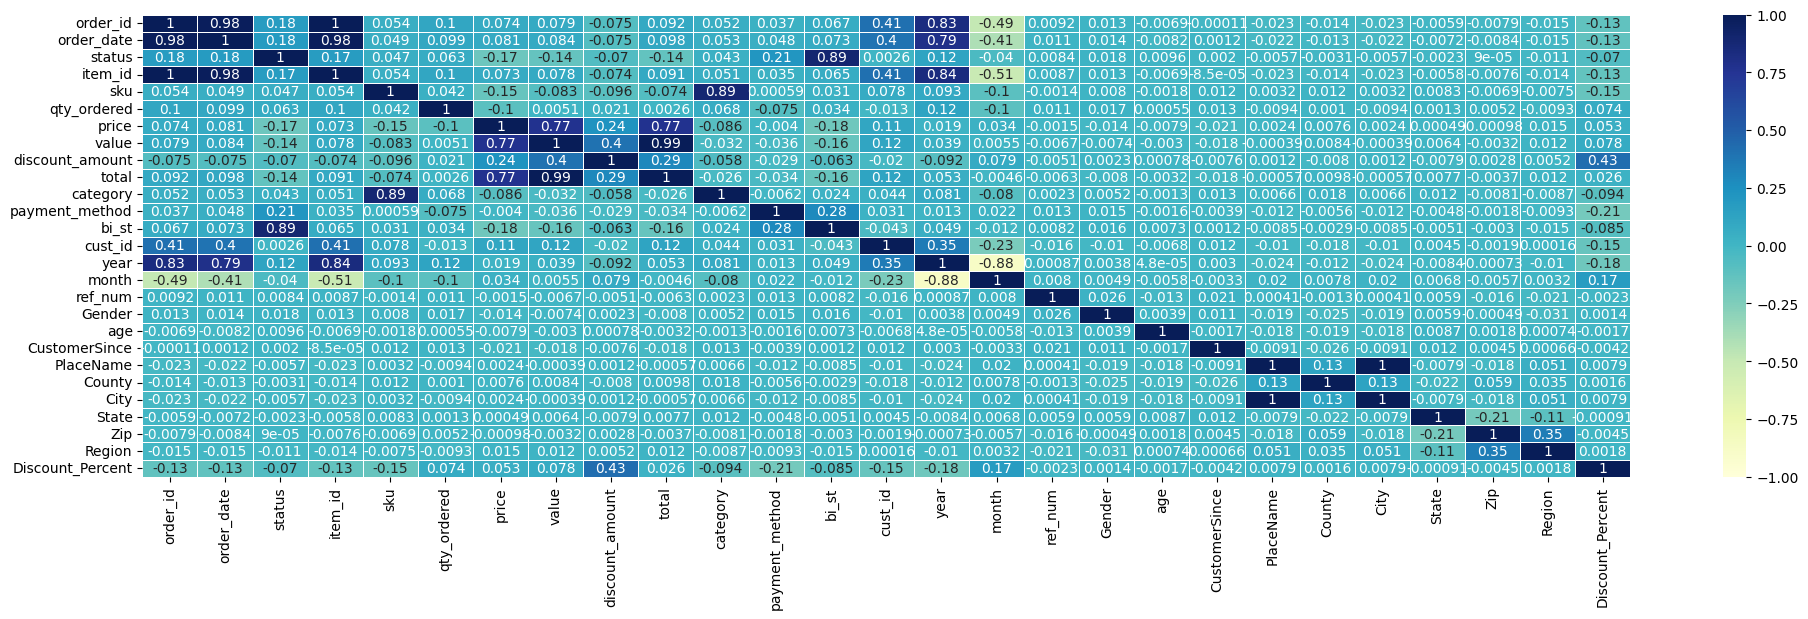

In [90]:
# Desplegamos el mapa de calor
plt.figure(figsize=(24, 6))
ax = sns.heatmap(df_olsales_ok.corr(), vmin=-1, vmax=1, annot=True, cmap="YlGnBu", linewidths=.5);

In [91]:
# Exportación del datdataframe completo a un dataset utilizable para Machine Learning

# df_olsales_ok.to_csv('dataset/online_sales_analize_full.csv', index=False)

#### Creación de un dataset analizable con menos columnas

In [92]:
# Desplegamos las columnas existentes
df_olsales_ok.columns

Index(['order_id', 'order_date', 'status', 'item_id', 'sku', 'qty_ordered',
       'price', 'value', 'discount_amount', 'total', 'category',
       'payment_method', 'bi_st', 'cust_id', 'year', 'month', 'ref_num',
       'Gender', 'age', 'CustomerSince', 'PlaceName', 'County', 'City',
       'State', 'Zip', 'Region', 'Discount_Percent'],
      dtype='object')

In [26]:
# Eliminamos las columnas que queramos descartar
columns_to_drop = ['value','bi_st','ref_num', 'CustomerSince','PlaceName', 'County', 'City']                                    # Definimos las columnas a eliminar
df_olsales_rec01 = df_olsales_ok                                                                                                # Asignamos al nuevo dataframe los valores del original
df_olsales_rec01 = df_olsales_rec01.drop(columns=['value','bi_st','ref_num', 'CustomerSince','PlaceName', 'County', 'City'])    # Eliminados las columnas definidas
df_olsales_rec01.head(15)                                                                                                       # Revisamos el dataframe creado


,order_id,order_date,status,item_id,sku,qty_ordered,price,discount_amount,total,category,payment_method,cust_id,year,month,Gender,age,State,Zip,Region,Discount_Percent
0,2,2020-10-01,12,574772,47773,21,89.9,0.00000,1798.00000,9,7,60124,2020,10,1,43,37,73571,3,0.000000
1,2,2020-10-01,12,574774,12364,11,19.0,0.00000,190.00000,9,7,60124,2020,10,1,43,37,73571,3,0.000000
2,4,2020-10-01,4,574777,47694,9,149.9,0.00000,1199.20000,9,7,60124,2020,10,1,43,37,73571,3,0.000000
3,4,2020-10-01,4,574779,47772,9,79.9,0.00000,639.20000,9,7,60124,2020,10,1,43,37,73571,3,0.000000
4,12669,2020-11-13,12,595185,31021,2,99.9,0.00000,99.90000,9,7,60124,2020,11,1,43,37,73571,3,0.000000
5,12669,2020-11-13,12,595186,27274,2,39.9,0.00000,39.90000,9,7,60124,2020,11,1,43,37,73571,3,0.000000
6,12672,2020-11-13,6,595192,21354,2,47.6,0.00000,47.60000,10,7,60124,2020,11,1,43,37,73571,3,0.000000
7,1,2020-10-01,1,574769,12499,2,49.0,0.00000,49.00000,10,3,42485,2020,10,2,28,10,32042,3,0.000000
8,1,2020-10-01,1,574770,47760,2,135.0,0.00000,135.00000,4,3,42485,2020,10,2,28,10,32042,3,0.000000
9,1,2020-10-01,1,574771,12545,2,549.9,0.00000,549.90000,1,3,42485,2020,10,2,28,10,32042,3,0.000000


In [27]:
# Calculamos su correlación
df_olsales_rec01.corr()

,order_id,order_date,status,item_id,sku,qty_ordered,price,discount_amount,total,category,payment_method,cust_id,year,month,Gender,age,State,Zip,Region,Discount_Percent
order_id,1.000000,0.981660,0.177583,0.999381,0.054339,0.102024,0.073847,-0.074981,0.091842,0.052182,0.037129,0.411826,0.831571,-0.490480,0.013440,-0.006923,-0.005929,-0.007858,-0.014612,-0.132261
order_date,0.981660,1.000000,0.184368,0.978452,0.049293,0.098782,0.081092,-0.074605,0.097721,0.052687,0.048199,0.396366,0.791248,-0.413741,0.014095,-0.008176,-0.007177,-0.008446,-0.014861,-0.125767
status,0.177583,0.184368,1.000000,0.173503,0.047471,0.062668,-0.172459,-0.069568,-0.138941,0.042886,0.214992,0.002560,0.124369,-0.040310,0.017963,0.009648,-0.002336,0.000090,-0.011478,-0.070295
item_id,0.999381,0.978452,0.173503,1.000000,0.054356,0.103074,0.072898,-0.073722,0.091474,0.051366,0.035174,0.413622,0.843113,-0.510725,0.013295,-0.006897,-0.005824,-0.007635,-0.014459,-0.133427
sku,0.054339,0.049293,0.047471,0.054356,1.000000,0.042203,-0.152082,-0.095638,-0.074183,0.888730,0.000590,0.077606,0.093177,-0.103339,0.007983,-0.001750,0.008340,-0.006928,-0.007454,-0.151194
qty_ordered,0.102024,0.098782,0.062668,0.103074,0.042203,1.000000,-0.103748,0.021244,0.002603,0.068219,-0.075221,-0.012639,0.119646,-0.103412,0.016760,0.000552,0.001259,0.005192,-0.009267,0.073697
price,0.073847,0.081092,-0.172459,0.072898,-0.152082,-0.103748,1.000000,0.241494,0.770518,-0.086435,-0.003974,0.107743,0.019229,0.034325,-0.013579,-0.007935,0.000488,-0.000976,0.015471,0.053462
discount_amount,-0.074981,-0.074605,-0.069568,-0.073722,-0.095638,0.021244,0.241494,1.000000,0.292218,-0.057796,-0.028689,-0.020460,-0.092108,0.079275,0.002254,0.000782,-0.007868,0.002785,0.005185,0.426131
total,0.091842,0.097721,-0.138941,0.091474,-0.074183,0.002603,0.770518,0.292218,1.000000,-0.025936,-0.033585,0.123297,0.052991,-0.004550,-0.007978,-0.003209,0.007713,-0.003695,0.012234,0.026287
category,0.052182,0.052687,0.042886,0.051366,0.888730,0.068219,-0.086435,-0.057796,-0.025936,1.000000,-0.006181,0.043989,0.080794,-0.079981,0.005213,-0.001328,0.011996,-0.008139,-0.008692,-0.094231


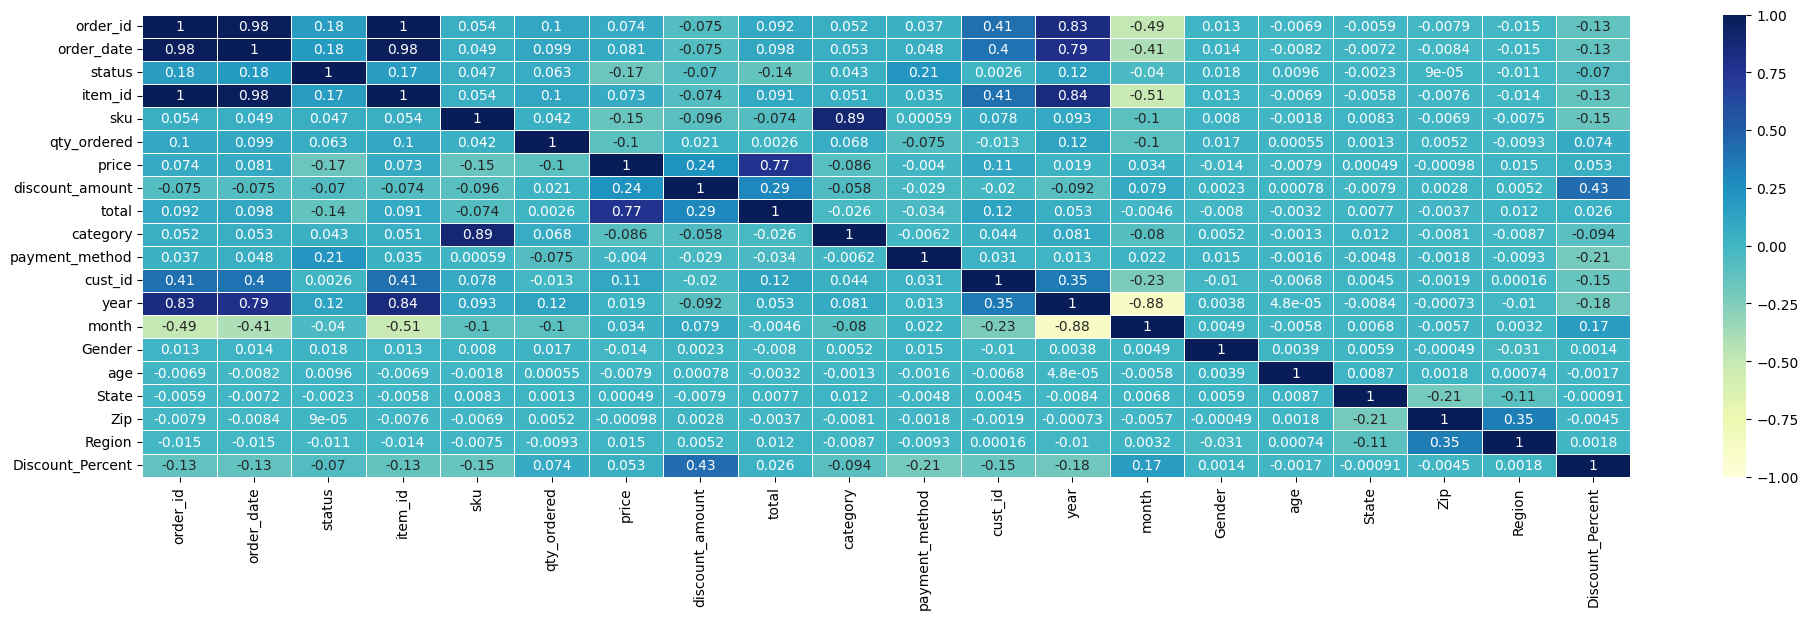

In [28]:
# Desplegamos su mapa de calor
plt.figure(figsize=(24, 6))
ax = sns.heatmap(df_olsales_rec01.corr(), vmin=-1, vmax=1, annot=True, cmap="YlGnBu", linewidths=.5);

In [96]:
# Exportación del datdataframe con el primer corte a un dataset utilizable para Machine Learning

df_olsales_rec01.to_csv('dataset/online_sales_analize_rec01.csv', index=False)

### ACTUALIZACIÓN DE LOS DATASETS CON LAS COORDENADAS DE LOS ZIP

#### Importaciones de los datasets

In [3]:
# Importamos el dataset
df_online_sales_analize_full = pd.read_csv('dataset/online_sales_analize_full.csv')
df_online_sales_analize_rec01 = pd.read_csv('dataset/online_sales_analize_rec01.csv')
df_uszips = pd.read_csv('dataset/uszips.csv')

#### Agregamos coordenadas

In [6]:
# Verificamos dataframes

# df_online_sales_analize_full.head(10)
# df_online_sales_analize_rec01.head(10)
df_uszips.head(10)


,zip,lat,lng,city,state_id,state_name,zcta,parent_zcta,population,density,county_fips,county_name,county_weights,county_names_all,county_fips_all,imprecise,military,timezone
0,601,18.18027,-66.75266,Adjuntas,PR,Puerto Rico,True,NaN,16834.0,100.9,72001,Adjuntas,"{""72001"": 98.73, ""72141"": 1.27}",Adjuntas|Utuado,72001|72141,False,False,America/Puerto_Rico
1,602,18.36075,-67.17541,Aguada,PR,Puerto Rico,True,NaN,37642.0,479.2,72003,Aguada,"{""72003"": 100}",Aguada,72003,False,False,America/Puerto_Rico
2,603,18.45744,-67.12225,Aguadilla,PR,Puerto Rico,True,NaN,49075.0,551.7,72005,Aguadilla,"{""72005"": 99.76, ""72099"": 0.24}",Aguadilla|Moca,72005|72099,False,False,America/Puerto_Rico
3,606,18.16585,-66.93716,Maricao,PR,Puerto Rico,True,NaN,5590.0,48.7,72093,Maricao,"{""72093"": 82.27, ""72153"": 11.66, ""72121"": 6.06}",Maricao|Yauco|Sabana Grande,72093|72153|72121,False,False,America/Puerto_Rico
4,610,18.29110,-67.12243,Anasco,PR,Puerto Rico,True,NaN,25542.0,265.7,72011,AÃ±asco,"{""72011"": 96.7, ""72099"": 2.81, ""72083"": 0.37, ...",AÃ±asco|Moca|Las MarÃ­as|Aguada,72011|72099|72083|72003,False,False,America/Puerto_Rico
5,611,18.27698,-66.80688,Angeles,PR,Puerto Rico,True,NaN,1315.0,47.7,72141,Utuado,"{""72141"": 100}",Utuado,72141,False,False,America/Puerto_Rico
6,612,18.41283,-66.70510,Arecibo,PR,Puerto Rico,True,NaN,63312.0,321.1,72013,Arecibo,"{""72013"": 98.94, ""72065"": 0.94, ""72017"": 0.11}",Arecibo|Hatillo|Barceloneta,72013|72065|72017,False,False,America/Puerto_Rico
7,616,18.41878,-66.66790,Bajadero,PR,Puerto Rico,True,NaN,9625.0,341.4,72013,Arecibo,"{""72013"": 100}",Arecibo,72013,False,False,America/Puerto_Rico
8,617,18.44598,-66.56006,Barceloneta,PR,Puerto Rico,True,NaN,22573.0,474.8,72017,Barceloneta,"{""72017"": 99.63, ""72054"": 0.37}",Barceloneta|Florida,72017|72054,False,False,America/Puerto_Rico
9,622,17.98892,-67.15660,Boqueron,PR,Puerto Rico,True,NaN,7577.0,93.9,72023,Cabo Rojo,"{""72023"": 100}",Cabo Rojo,72023,False,False,America/Puerto_Rico


In [7]:
# Verificamos columnas del dataset de los zip
df_uszips.columns

Index(['zip', 'lat', 'lng', 'city', 'state_id', 'state_name', 'zcta',
       'parent_zcta', 'population', 'density', 'county_fips', 'county_name',
       'county_weights', 'county_names_all', 'county_fips_all', 'imprecise',
       'military', 'timezone'],
      dtype='object')

In [15]:
# ESTANDARIZAMOS NOMBRE DE LAS COLUMNAS zip

# Verificamos nombres de las columnas
# df_online_sales_analize_full.columns              # Cambiar de Zip a zip
# df_online_sales_analize_rec01.columns             # Cambiar de Zip a zip

# Hacemos las correcciones necesarias
# df_online_sales_analize_full.rename(columns={'Zip':'zip'}, inplace=True)
df_online_sales_analize_rec01.rename(columns={'Zip':'zip'}, inplace=True)

# Verificamos la corrección
# df_online_sales_analize_full.columns
df_online_sales_analize_rec01.columns

Index(['order_id', 'order_date', 'status', 'item_id', 'sku', 'qty_ordered',
       'price', 'discount_amount', 'total', 'category', 'payment_method',
       'cust_id', 'year', 'month', 'Gender', 'age', 'State', 'zip', 'Region',
       'Discount_Percent'],
      dtype='object')

In [9]:
# Extraemos solo las columnas que nos interesa de df_uszips
selected_columns = ['zip', 'lat', 'lng']
df_coordenadas = df_uszips[selected_columns].reset_index(drop=True)
df_coordenadas.head()

,zip,lat,lng
0,601,18.18027,-66.75266
1,602,18.36075,-67.17541
2,603,18.45744,-67.12225
3,606,18.16585,-66.93716
4,610,18.29110,-67.12243


In [19]:
# Verificamos lso tipos de datos del dataframe
df_coordenadas.dtypes

zip      int64
lat    float64
lng    float64
dtype: object

In [8]:
# Respaldamos los datasets originales delos datos de ventas
df_online_sales_analize_full.to_csv('ant/online_sales_analize_full-ori.csv', index=False)
df_online_sales_analize_rec01.to_csv('ant/online_sales_analize_rec01-ori.csv', index=False)

In [17]:
# Agregamos las coordenadas de los zip

# df_online_sales_analize_full_temp = df_online_sales_analize_full.merge(df_coordenadas, on = 'zip', how = 'left')
df_online_sales_analize_rec01_temp = df_online_sales_analize_rec01.merge(df_coordenadas, on = 'zip', how = 'left')
# df_online_sales_analize_full_temp .head()
df_online_sales_analize_rec01_temp.head()

,order_id,order_date,status,item_id,sku,qty_ordered,price,discount_amount,total,category,...,year,month,Gender,age,State,zip,Region,Discount_Percent,lat,lng
0,2,2020-10-01,12,574772,47773,21,89.9,0.0,1798.0,9,...,2020,10,1,43,37,73571,3,0.0,34.9325,-99.92476
1,2,2020-10-01,12,574774,12364,11,19.0,0.0,190.0,9,...,2020,10,1,43,37,73571,3,0.0,34.9325,-99.92476
2,4,2020-10-01,4,574777,47694,9,149.9,0.0,1199.2,9,...,2020,10,1,43,37,73571,3,0.0,34.9325,-99.92476
3,4,2020-10-01,4,574779,47772,9,79.9,0.0,639.2,9,...,2020,10,1,43,37,73571,3,0.0,34.9325,-99.92476
4,12669,2020-11-13,12,595185,31021,2,99.9,0.0,99.9,9,...,2020,11,1,43,37,73571,3,0.0,34.9325,-99.92476


In [22]:
# Reemplazamos los valores Nan por ceros en las columnas 'lat' y 'lng'
df_online_sales_analize_full_temp[['lat', 'lng']] = df_online_sales_analize_full_temp[['lat', 'lng']].fillna('')
df_online_sales_analize_rec01_temp[['lat', 'lng']] = df_online_sales_analize_rec01_temp[['lat', 'lng']].fillna('')

In [25]:
# Verificamos los reemplazos
df_online_sales_analize_full_temp.head(10)
df_online_sales_analize_rec01_temp.head(10)

,order_id,order_date,status,item_id,sku,qty_ordered,price,discount_amount,total,category,...,year,month,Gender,age,State,zip,Region,Discount_Percent,lat,lng
0,2,2020-10-01,12,574772,47773,21,89.9,0.0,1798.0,9,...,2020,10,1,43,37,73571,3,0.0,34.9325,-99.92476
1,2,2020-10-01,12,574774,12364,11,19.0,0.0,190.0,9,...,2020,10,1,43,37,73571,3,0.0,34.9325,-99.92476
2,4,2020-10-01,4,574777,47694,9,149.9,0.0,1199.2,9,...,2020,10,1,43,37,73571,3,0.0,34.9325,-99.92476
3,4,2020-10-01,4,574779,47772,9,79.9,0.0,639.2,9,...,2020,10,1,43,37,73571,3,0.0,34.9325,-99.92476
4,12669,2020-11-13,12,595185,31021,2,99.9,0.0,99.9,9,...,2020,11,1,43,37,73571,3,0.0,34.9325,-99.92476
5,12669,2020-11-13,12,595186,27274,2,39.9,0.0,39.9,9,...,2020,11,1,43,37,73571,3,0.0,34.9325,-99.92476
6,12672,2020-11-13,6,595192,21354,2,47.6,0.0,47.6,10,...,2020,11,1,43,37,73571,3,0.0,34.9325,-99.92476
7,1,2020-10-01,1,574769,12499,2,49.0,0.0,49.0,10,...,2020,10,2,28,10,32042,3,0.0,,
8,1,2020-10-01,1,574770,47760,2,135.0,0.0,135.0,4,...,2020,10,2,28,10,32042,3,0.0,,
9,1,2020-10-01,1,574771,12545,2,549.9,0.0,549.9,1,...,2020,10,2,28,10,32042,3,0.0,,


In [27]:
# Actualizamos los archivos
df_online_sales_analize_full_temp.to_csv('dataset/online_sales_analize_full.csv')
df_online_sales_analize_rec01_temp.to_csv('dataset/online_sales_analize_rec01.csv')